In [ ]:
import sys
'geopandas' in sys.modules
!pip install geopandas
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
Emilia_Romagna = gpd.read_file('/content/drive/MyDrive/Thesis/Python codes/Graphs/italian-maps-shapefiles-master/italian-maps-shapefiles-master/regions-with-provinces/emilia-romagna/emilia-romagna.shp')
new_provinces = pd.read_excel('/content/drive/MyDrive/Thesis/Python codes/Graphs/italian-maps-shapefiles-master/italian-maps-shapefiles-master/regions-with-provinces/emilia-romagna/emilia-romagna_con_accento.xlsx')
Emilia_Romagna['NOME_PRO'] = new_provinces['NOME_PRO']
Food_waste_ATECO = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste production per province - ER/Food Waste per ATECO.csv')
Food_waste_EER = pd.read_csv('/content/drive/MyDrive/Thesis/Python codes/Waste production per province - ER/Food Waste per EER.csv')
Emilia_Romagna.head()

In [ ]:
for i in range(3,13):

  ATECO_map = Emilia_Romagna.merge(Food_waste_ATECO.iloc[:, [1,2,i]], on='NOME_PRO', how='right')

  fig, ax = plt.subplots(1, figsize=(24, 24))
  col = ATECO_map.columns[7]
  ax.set_title(col, fontdict={'fontsize':'50', 'fontweight':'5'}, color='Black', fontfamily='sans-serif')
  ATECO_map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')

  #print(col)

  # adjust the position of the map
  plt.subplots_adjust(bottom=0.3)

  # Plotting the name of each province
  for idx, row in ATECO_map.iterrows():
      ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['ABB_PRO'], fontsize=30, ha='center', va='center', color = 'black', fontfamily='sans-serif')

  # remove the axes
  ax.set_axis_off()

  # add a colorbar to the map
  sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=ATECO_map[col].min(), vmax=ATECO_map[col].max()))
  sm._A = []
  cbar = plt.colorbar(sm, shrink=0.5, pad=0.01, orientation = 'horizontal', label='Waste (t/year)')
  cbar.ax.xaxis.set_label_position('top')
  cbar.ax.xaxis.label.set_size(20)
  cbar.ax.tick_params(labelsize=16)
  cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), fontsize=16)

  

  # Use a custom formatter to format the colorbar labels in scientific notation
  formatter = ticker.FuncFormatter(lambda x, pos: '{:0.2e}'.format(x))
  cbar.formatter.set_scientific(True)
  cbar.formatter.set_powerlimits((-2, 3))
  cbar.update_ticks()

  # make the legend prettier
  #lgnd = plt.legend(prop={'size': 20}, title='Enterprises', loc='lower center', frameon=False)
  #plt.setp(lgnd.get_title(), fontsize='20')

  # show the map
  plt.show()

  path = f"/content/drive/MyDrive/Thesis/Graphs/Waste production per province/Food waste per ATECO_{col}"
  fig.savefig(path, dpi=300, bbox_inches='tight', format='png')

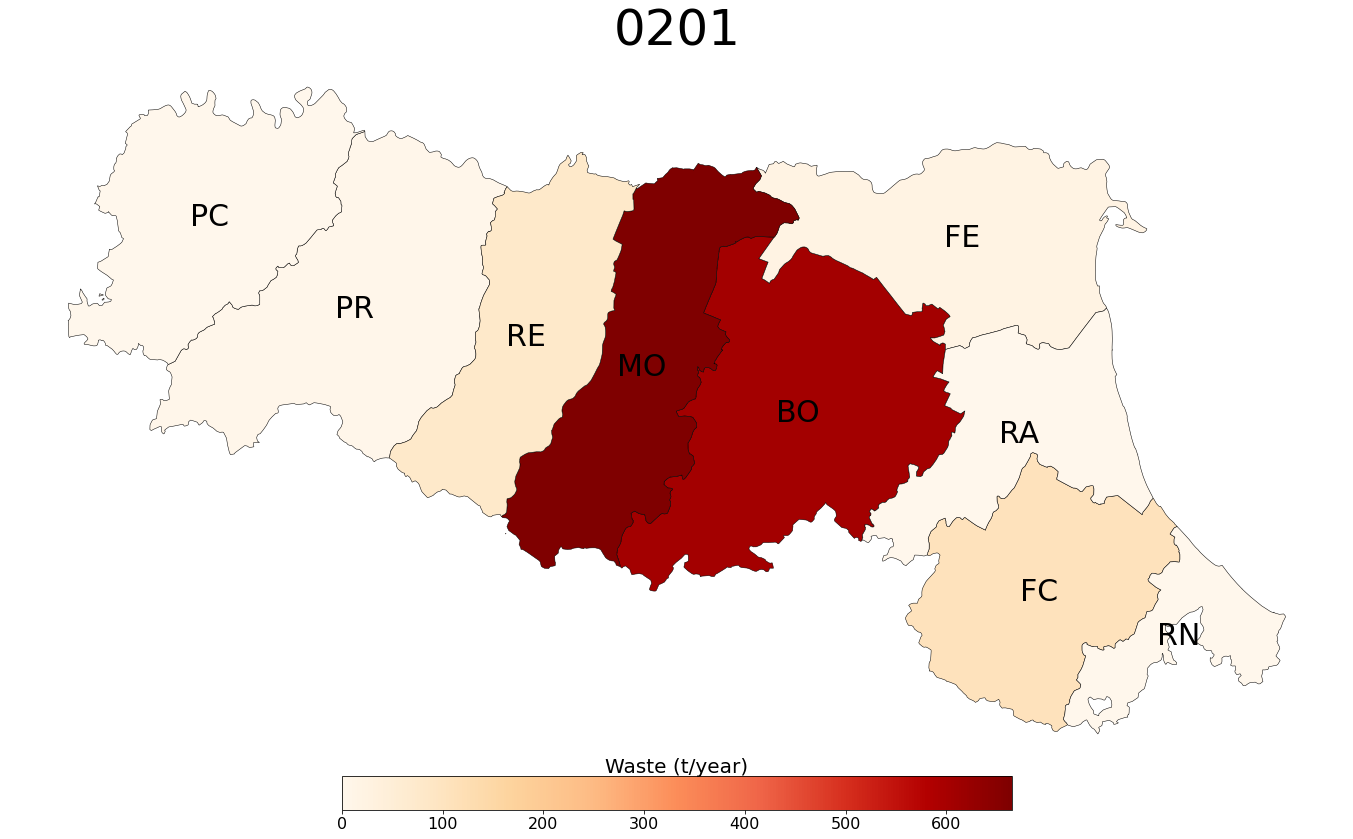

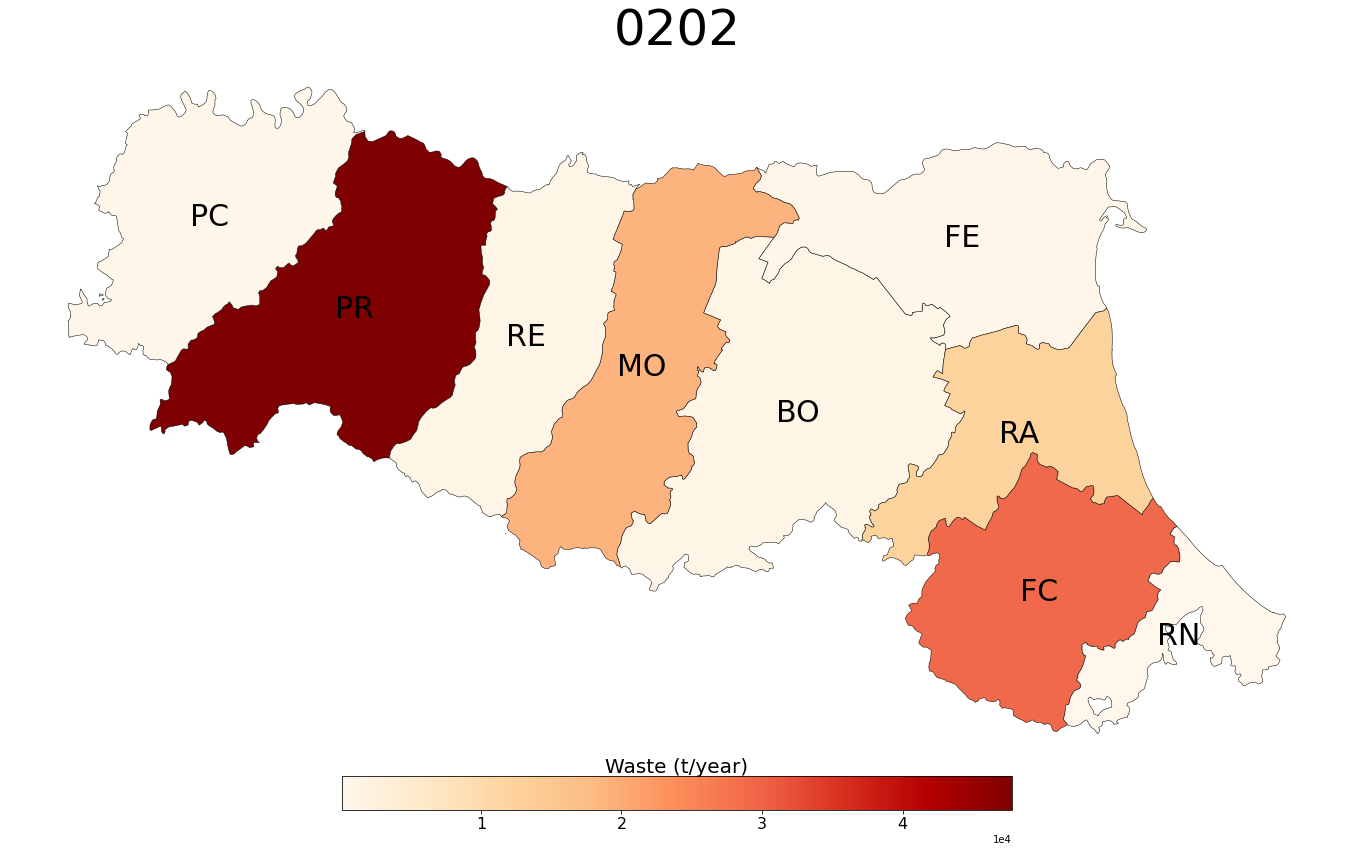

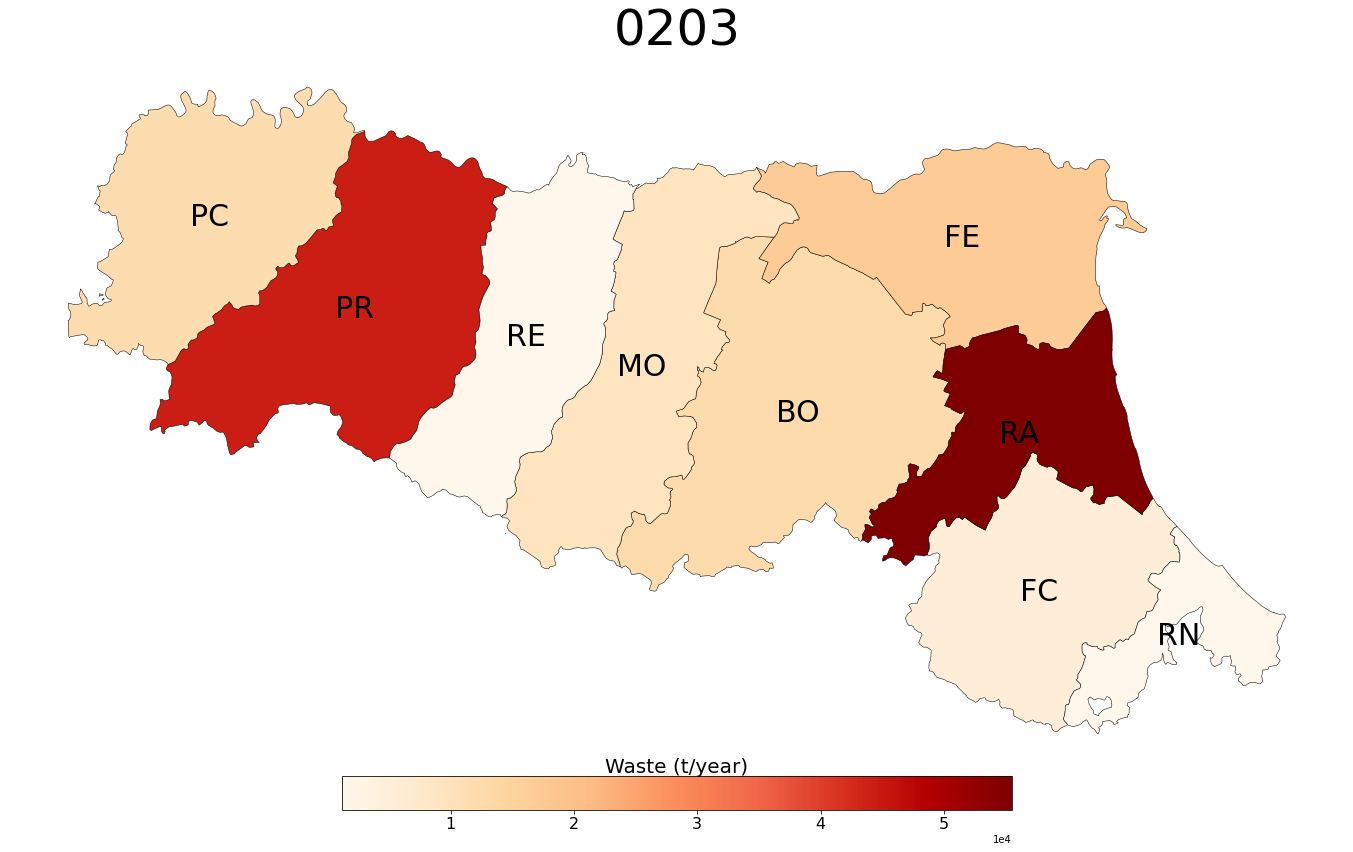

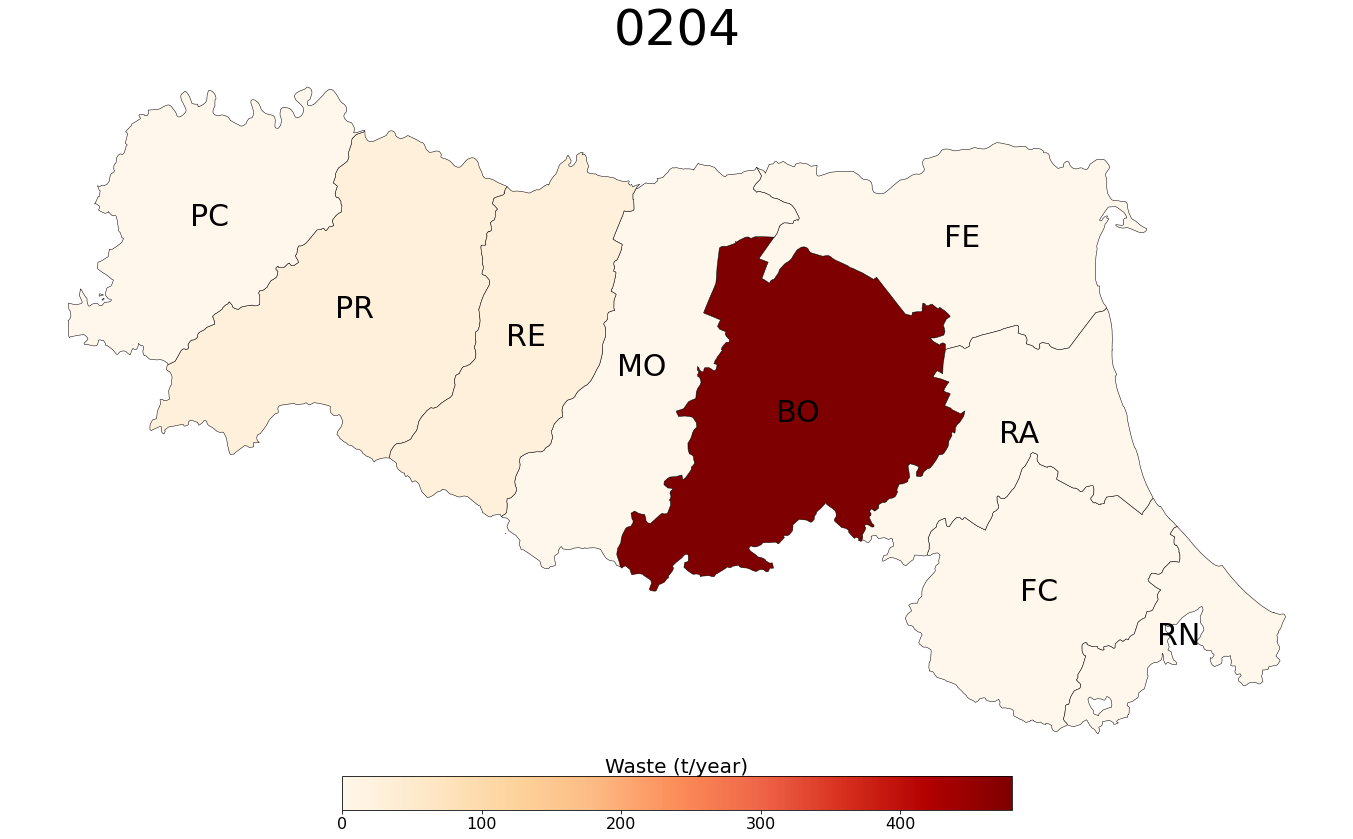

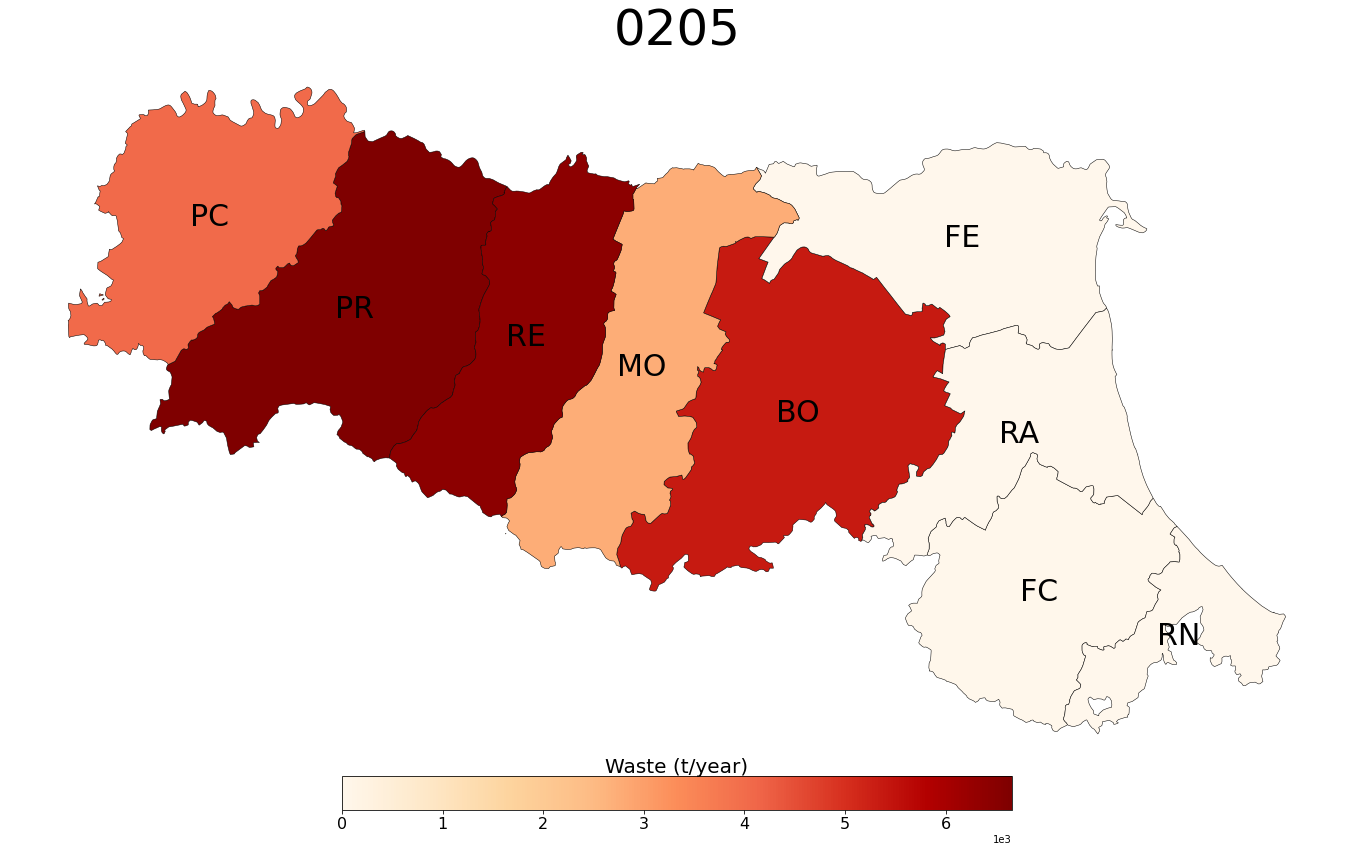

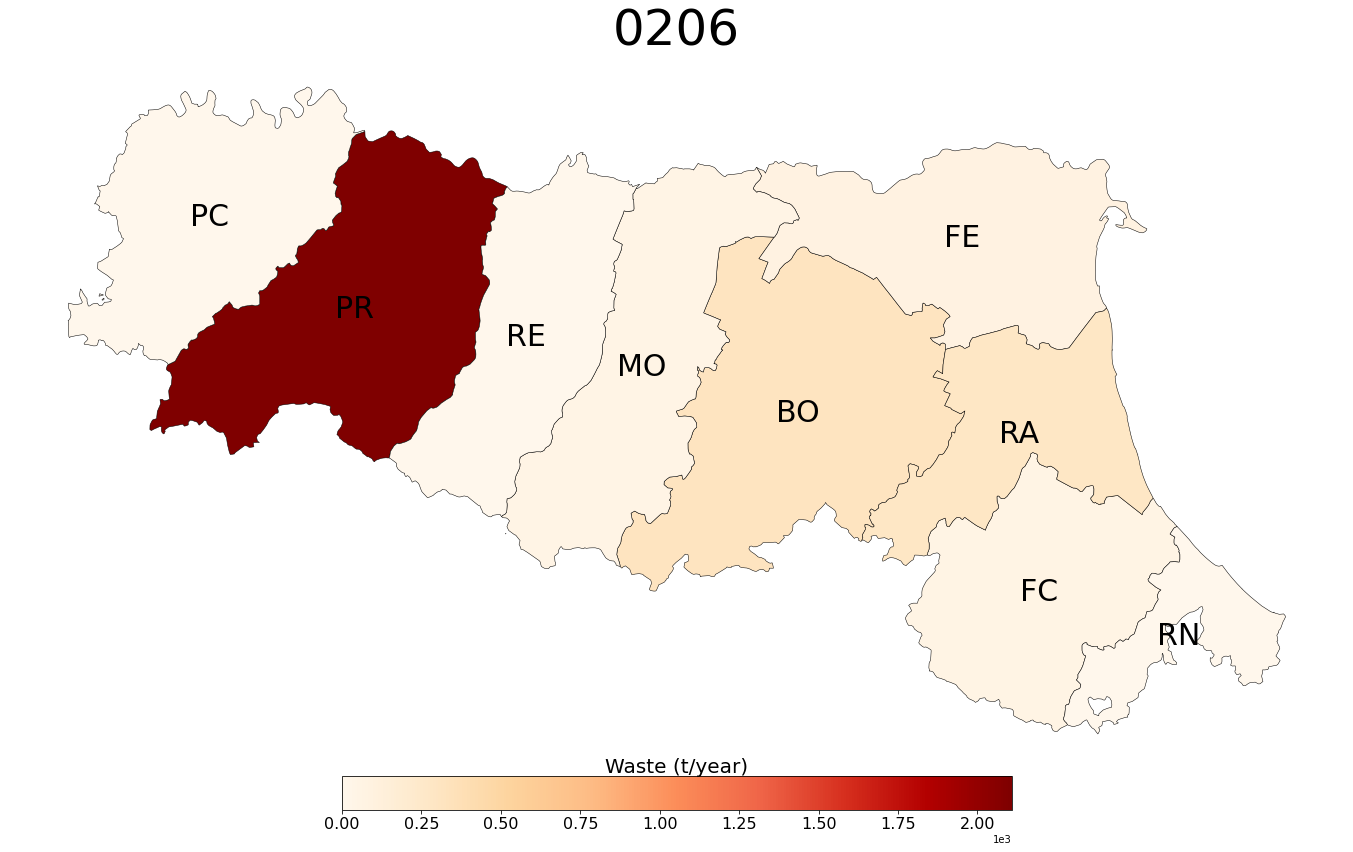

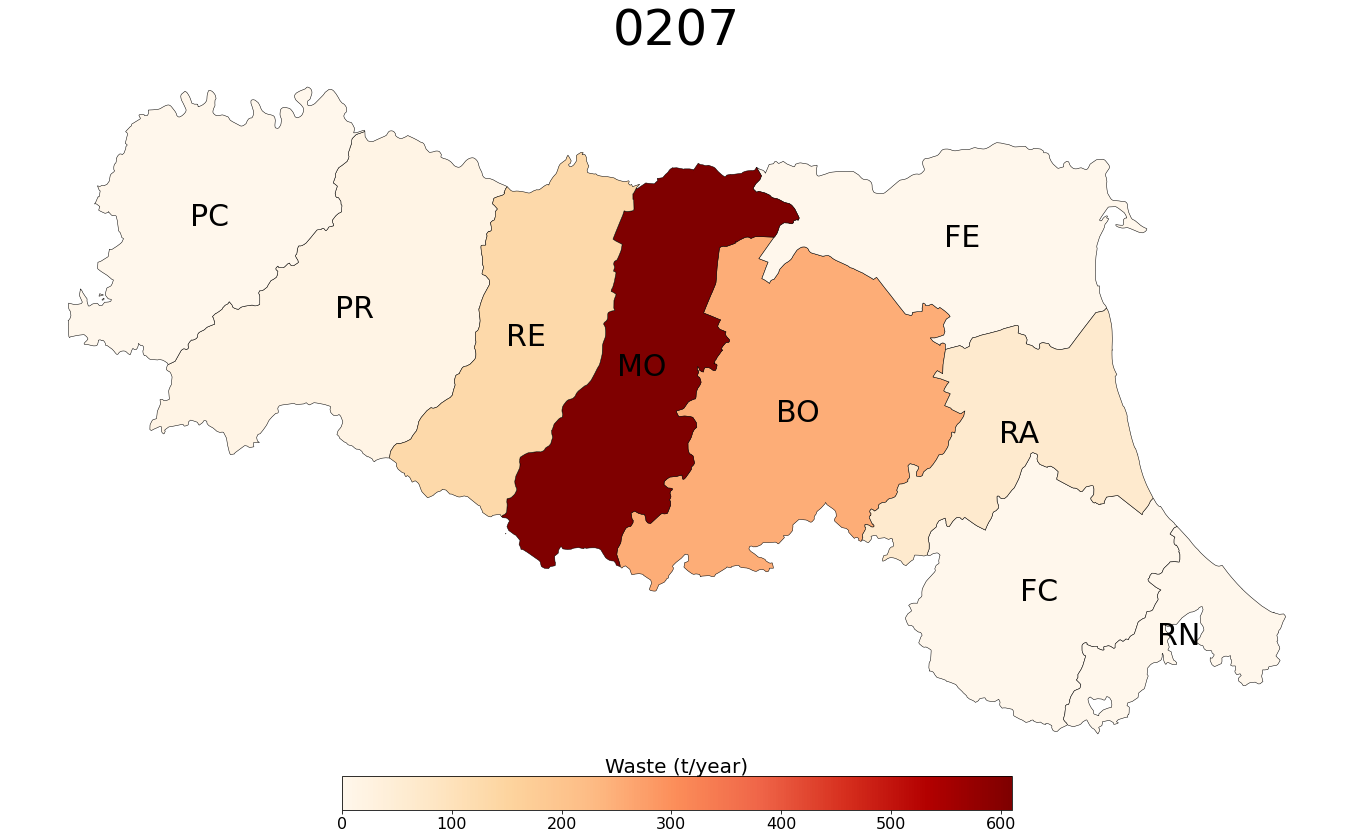

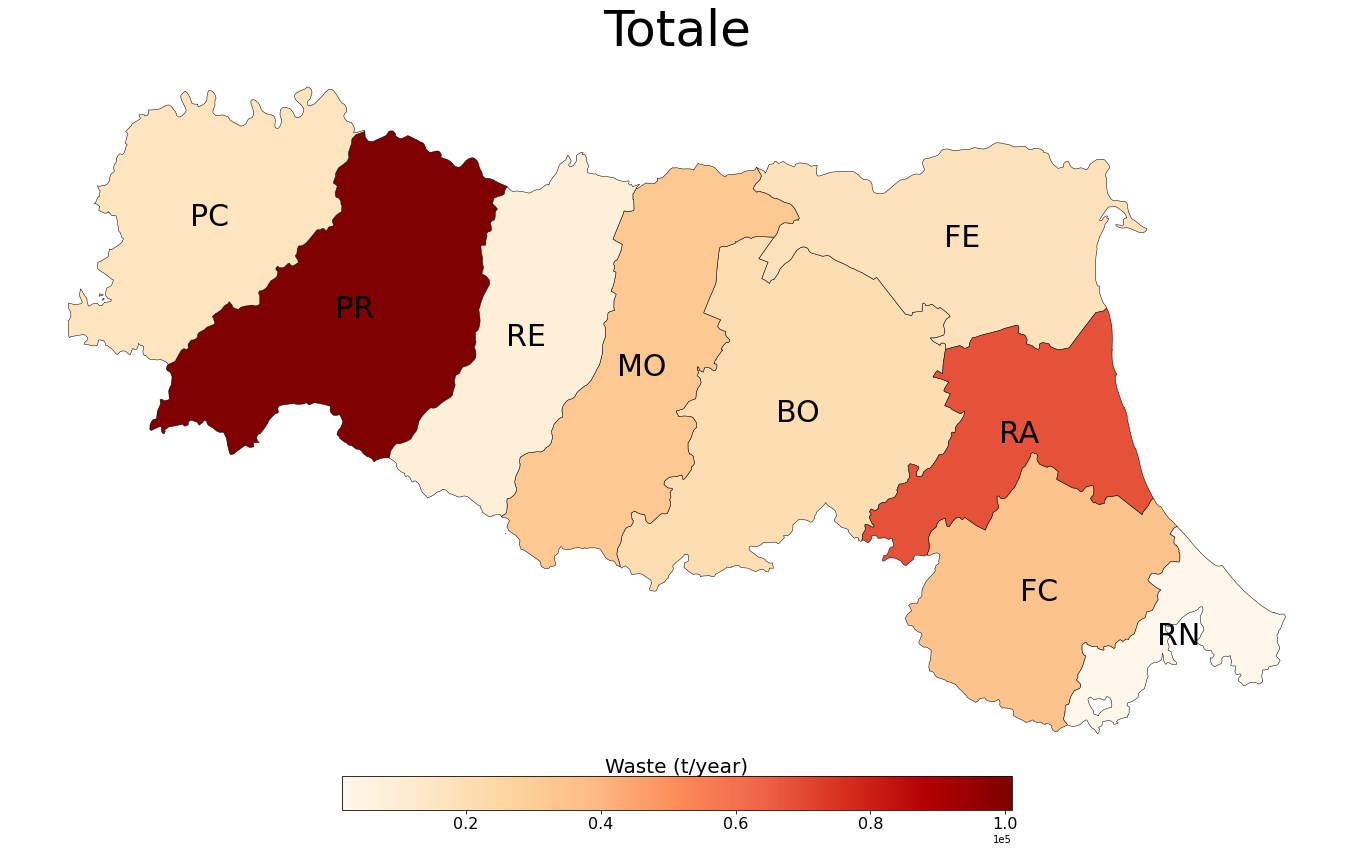

In [24]:
for i in range(3,11):

  EER_map = Emilia_Romagna.merge(Food_waste_EER.iloc[:, [1,2,i]], on='NOME_PRO', how='right')

  fig, ax = plt.subplots(1, figsize=(24, 24))
  col = EER_map.columns[7]
  ax.set_title(col, fontdict={'fontsize':'50', 'fontweight':'5'}, color='Black', fontfamily='sans-serif')
  EER_map.plot(ax=ax, column=col, cmap='OrRd', categorical=False, linewidth=0.5, edgecolor='black')

  #print(col)

  # adjust the position of the map
  plt.subplots_adjust(bottom=0.3)

  # Plotting the name of each province
  for idx, row in EER_map.iterrows():
      ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['ABB_PRO'], fontsize=30, ha='center', va='center', color = 'black', fontfamily='sans-serif')

  # remove the axes
  ax.set_axis_off()

  # add a colorbar to the map
  sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=EER_map[col].min(), vmax=EER_map[col].max()))
  sm._A = []
  cbar = plt.colorbar(sm, shrink=0.5, pad=0.01, orientation = 'horizontal', label='Waste (t/year)')
  cbar.ax.xaxis.set_label_position('top')
  cbar.ax.xaxis.label.set_size(20)
  cbar.ax.tick_params(labelsize=16)
  cbar.ax.set_xticklabels(cbar.ax.get_xticklabels(), fontsize=16)

  

  # Use a custom formatter to format the colorbar labels in scientific notation
  formatter = ticker.FuncFormatter(lambda x, pos: '{:0.2e}'.format(x))
  cbar.formatter.set_scientific(True)
  cbar.formatter.set_powerlimits((-2, 3))
  cbar.update_ticks()

  # make the legend prettier
  #lgnd = plt.legend(prop={'size': 20}, title='Enterprises', loc='lower center', frameon=False)
  #plt.setp(lgnd.get_title(), fontsize='20')

  # show the map
  plt.show()

  path = f"/content/drive/MyDrive/Thesis/Graphs/Waste production per province/Food waste per EER_{col}"
  fig.savefig(path, dpi=300, bbox_inches='tight', format='png')